# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from statsmodels.tsa.api import VAR


# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

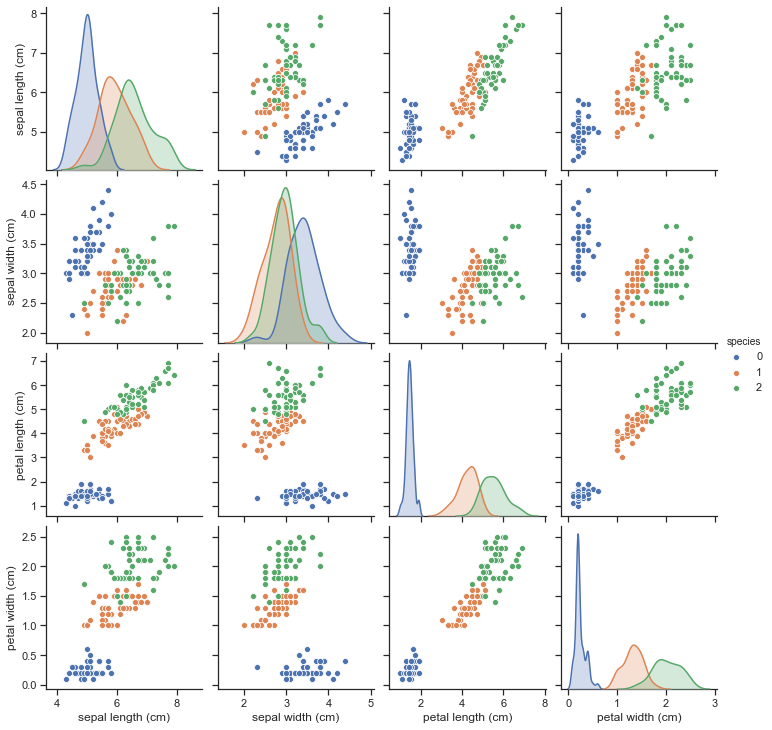

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


Code source for plot function: https://seaborn.pydata.org/examples/scatterplot_matrix.html 

In [2]:
# define plotting function

"""
The function takes as argument feature matrix X and column vector od labeles y, and plot the grid using Seaborn library.
It uses the pre-set with style "ticks".
"""

def myPlotGrid (X, y):
    
    #creating a data frame with a single column out of lables list (y), name it "types"
    df = pd.DataFrame(y, columns = ["types"])
    
    #adding columns of respective X features: alcohol, flavanoids, color_intensity, ash
    df = df.join(pd.DataFrame(X, columns = selected_features))
    
    #using Seaborn library creating a plot:
    sns.set(style="ticks") #set-up style
    sns.pairplot(df, hue="types") #calling the plot function, pass 1 arguments: data frame and column with labels 

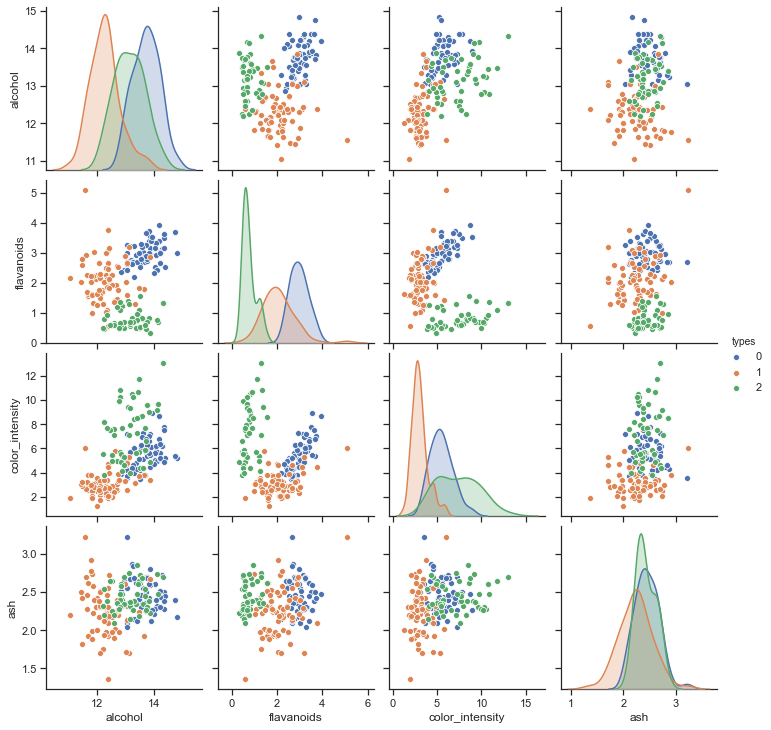

In [3]:
# run the plotting function
myPlotGrid (X, y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

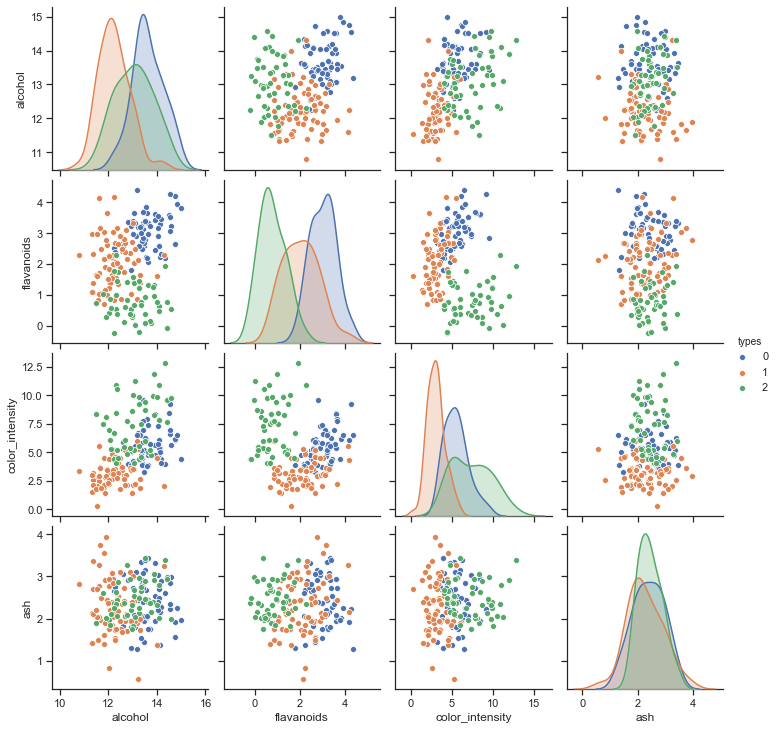

In [4]:
# noise code 
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)

myPlotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
    

In my opinion, the best pair is **flavanoids** and **color_intencity**. According to the plot above, it is obvious that exactely these 2 features diverese data points the most. In other words, this choice allows to distinguish between 3 classes in the easiest possible manner (comparing to the other features presentes). So if it would be the case in real life, sommelier would rather pay attention to the bouqet of flavanoids with consideration of the color intensity in order to classify the given wine sample.
Here is a graphical example:

<img src="q1_CW_ML.png">


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:



Overall noise makes it more difficult to classify the data, whereas given clean data provides even visual separation of the classes. Generaly, adding noise influences on 2 things: 
1. Boundaries of classes become less exact, pretty many points belong to the borderline and "suit" several classes simultaneously.
2. Outliers can "fool" the algorithm and shift or change the curve/angle of the boundary.

<img src="q2_CW_ML.png">

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


===!!!===

##### Comment for KNN helper functions code: 
I have once implemented KNN from scrtach before: last year during some self-learning cources (kind of remote internship) in one IT company. I do have similiar in logic code on my **GitHub** (I am not sure I am alowed to identify myself, so will not mention the nickname, but if you find the code there it would be clear I am a student of UOL) and I assume that other interns could possible have done something similiar (task was pretty precised) and posted it somewhere too. Please consider this as reference.

===!!!===

In [5]:
# helper code

#euclidean and chebyshev distances

"""
The following function takes as aurguments train and test sets of X - labeled and unlabeled respectively, - 
and type of the distance measure (only euclidean and chebyshev are currently available).

The function breakes labeled and unlabeled sets of X into rows (vectors),
where each row (vector) is treated as a list of coordinates of a particular data point in N-dimensional space.
N here is the number of features (columns) of X sets, however, it has no influence on calculations.
The function has outer and inner loop. Outer loop iterates through rows of train X,
and inner loop iterates through rows of test X. As a result, the function returns the array of distances 
of shape [rows_of_train_X, rows_of_test_X]. In other words, each row of the returned array is a list of distances 
to the respective train data point from each respective test data points.
"""

def distance_calc(labeled_x, unknown_x, d_type): #pass train and test sets of X, type of the distance measure
    
    num_trained = labeled_x.shape[0] #quantity of rows in train set of X (labels are known)
    num_pred = unknown_x.shape[0] #quantity of rows in test set of X (labels are unknown)
    
    dists = np.zeros((num_trained, num_pred)) #creation of the array of distances 

    for i in range (num_trained): #loop through labeled data points
        for j in range (num_pred): #loop through unlabeled data points
            #check which type of distance was passed as argument, calculate it and append result to a distance array.
            if d_type == "euclidean":
                dists[i,j] = np.sqrt(np.sum(np.square(labeled_x[i] - unknown_x[j])))
            elif d_type == "chebyshev":
                dists[i,j] = (np.max(np.abs(labeled_x[i] - unknown_x[j])))
            else:
                print ("Only Euclidean or Chebyshev distances are allowed")
    
    return dists


In [6]:
# helper code

#nearest neighbours

"""
This function takes as input the list of labels (y), the array of distances between data points, 
and quantity of nearest neighbours.
The function loop through the each row of the distance array, 
where row represents a list of distances from the test points to one respective train point. 
On each iteration it chooses the k smallest distances, take the index of those and parse respective label(s) from y.
Parsed k labele(s) is/are stored as a row vector. Function returns the list of such vectors (array).
"""

def k_nearest_labels(y, dist, k): #pass label array. distance array and quantity of neighbours as arguments
    
    nearest_lab = [] #creation of the array for lables 
    #transpose the array (read matrix) of distances in order to have not columns,
    #but rows with distances from train points to the respective test point:
    dist = dist.T 
    num_pred = dist.shape[0] #store the new quantity of rows
    for i in range (num_pred): #loop through rows
        dst = dist[i] #'select' current row
        #1. using built-in NumpPy function argpartition that returns indices of ascending sorted array, 
        #where all smallest elements are before the indicated index
        #2. slice the array from #0 element to #k element (in othe words - slice k smallest distances)
        #3. loop through this array with the help of list comprehension and store k selected labels into buffer array:
        buf = [y[j] for j in np.argpartition(dst, k)[:k]] 
        nearest_lab.append(buf) #append the k nearest lable to the array to return
        
    return np.asarray(nearest_lab)

In [7]:
#test

"""
Here is the testing of the custom functions from above and comparing the results from ready-made sklearn functions
"""

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import pairwise_distances

print("\n\t\t EDISTANCE CALCULATOR AND NEAREST LABELS FUNCTIONS TESTS \n")

x1 = np.array([[1,1], [3,3], [4, 4]])
print ("Train set of X: \n",x1, "\n")
x2 = np.array([[2,2],[3,3], [5, 5], [3,3]])
print ("Test set of X: \n",x2, "\n")
d1 = distance_calc(x1, x2, "euclidean")
d2 = distance_calc(x1, x2, "chebyshev")
print("Points in 2D, 3 labeled and 4 unlabeled: \n\n Euclidean distances by custom function: \n",d1, "\n")
print("Euclidean distances by sklearn: \n",euclidean_distances(x1, x2), "\n")
print("Chebyshev distances by custom function: \n",d2, "\n")
print("Chebyshev distances by sklearn: \n",pairwise_distances(x1, x2, metric = 'chebyshev'), "\n")


print("2 nearest labels (Euclidean distance):")
labels = np.array([2, 3, 1])
knl_e = k_nearest_labels(labels, d1, 2)
print(knl_e, "\n")

print("2 nearest labels (Chebyshev distance):")
knl_ch = k_nearest_labels(labels, d2, 2)
print(knl_ch, "\n")



		 EDISTANCE CALCULATOR AND NEAREST LABELS FUNCTIONS TESTS 

Train set of X: 
 [[1 1]
 [3 3]
 [4 4]] 

Test set of X: 
 [[2 2]
 [3 3]
 [5 5]
 [3 3]] 

Points in 2D, 3 labeled and 4 unlabeled: 

 Euclidean distances by custom function: 
 [[1.41421356 2.82842712 5.65685425 2.82842712]
 [1.41421356 0.         2.82842712 0.        ]
 [2.82842712 1.41421356 1.41421356 1.41421356]] 

Euclidean distances by sklearn: 
 [[1.41421356 2.82842712 5.65685425 2.82842712]
 [1.41421356 0.         2.82842712 0.        ]
 [2.82842712 1.41421356 1.41421356 1.41421356]] 

Chebyshev distances by custom function: 
 [[1. 2. 4. 2.]
 [1. 0. 2. 0.]
 [2. 1. 1. 1.]] 

Chebyshev distances by sklearn: 
 [[1. 2. 4. 2.]
 [1. 0. 2. 0.]
 [2. 1. 1. 1.]] 

2 nearest labels (Euclidean distance):
[[2 3]
 [3 1]
 [1 3]
 [3 1]] 

2 nearest labels (Chebyshev distance):
[[2 3]
 [3 1]
 [1 3]
 [3 1]] 



In [8]:
# mykNN code

"""
This is the function that put together the KNN model.
As arguments it takes X and y train sets, X test set, as well as quantity of neighbours (k) and the type of distance to use.
"""

def mykNN(X, y, X_, k, d_type):
    
    
    dists = distance_calc(X, X_, d_type) #calculation of the distances and storing them in the respective array
    
    nearest_labs = k_nearest_labels(y, dists, k) #calculation of nearest labels and storing them into respective array
    prediction = [] #array for storing the results, namely labels for test X
        
    for row in nearest_labs: #loop through the nearest labels
        #with the help of built-in NumPy function, store unique elements (labels)
        #and quantity of times each of them repeted in the nearest label array: 
        unique, count = np.unique(row, return_counts = True) 
        #1. again, with the help np.argpartition, return indices of the array of counts each label repeat sorted in ascending order
        #2. take the last index (index of the biggest count array element, which reffers to the most repeatable label)
        ind = np.argpartition(count, 0)[-1] 
        prediction.append(unique[ind]) #append this label
        
    return np.asarray(prediction)

In [9]:
def my_split (X, y):
    
    #split 75% train / 25% test
    
    X_train = X[:int(len(X)*0.75)]
    X_test = X[int(len(X)*0.75):]
    y_train = y[:int(len(y)*0.75)]
    y_test = y[int(len(y)*0.75):]
    
    return X_train, X_test, y_train, y_test

In [10]:
from sklearn.neighbors import KNeighborsClassifier

"""
Here is the testing of the custom KNN function from above and comparing to the results from ready-made sklearn KNN
"""

X_train, X_test, y_train, y_test = my_split (X, y)
XN_train, XN_test, y_train, y_test = my_split (XN, y)

k = 3
d_types = ["euclidean", "chebyshev"]

print("\t\t K-NEAREST NEIGHBOURS FUNCTION TEST\n")
for dist in d_types:
    
    knn = KNeighborsClassifier(n_neighbors = k, metric = dist)
    
    print("DISTANCE:", dist)
    
    print("CLEAN DATA:")
    y_pred_cl = mykNN(X_train, y_train, X_test, k, dist)
    knn.fit(X_train,y_train)
    y_skl_cl = knn.predict(X_test)
    similar = len((np.where((y_pred_cl == y_skl_cl) == True)[0]))
    total = len(X_test)
    print("Custom and sklearn algoritms have predicted the same labels for", similar,"data points out of", total)
    
    
    print("NOISY DATA:")
    y_pred_n = mykNN(XN_train, y_train, XN_test, k, dist)
    knn.fit(XN_train,y_train)
    y_skl_n = knn.predict(XN_test)
    similar = len((np.where((y_pred_n == y_skl_n) == True)[0]))
    total = len(XN_test)
    print("Custom and sklearn algoritms have predicted the same labels for", similar,"data points out of", total)
    
    print("\n")

    

		 K-NEAREST NEIGHBOURS FUNCTION TEST

DISTANCE: euclidean
CLEAN DATA:
Custom and sklearn algoritms have predicted the same labels for 41 data points out of 45
NOISY DATA:
Custom and sklearn algoritms have predicted the same labels for 35 data points out of 45


DISTANCE: chebyshev
CLEAN DATA:
Custom and sklearn algoritms have predicted the same labels for 41 data points out of 45
NOISY DATA:
Custom and sklearn algoritms have predicted the same labels for 41 data points out of 45




## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [11]:
# confusion matrix, accuracy, precision, recall, etc. 

"""
Function takes test y and predicted y as input, and return the accuracy
"""
def myAccuracy(y, y_):
    
    #declaring variables:
    accuracy = 0 #to store and return the accuarcy result
    flag = 0 #to count the quantity of the same elemts on the same positions in input arrays
    
    #loop through test and predicted y:
    for i in range(len(y)):#loop in range [0,N), where N is the quantity of elements in one of the arrays (has to be equal in both)
        if y[i] == y_[i]: #if element on the same position is the same:
            flag+=1 #increment counter
    
    accuracy = flag/len(y) #ratio of same elements in total quantity
    return accuracy #return result


"""
Function takes test y and predicted y as input, and return a confusion matrix
"""
def myConfMatr(y,y_):
    
    class_num = len(np.unique(y)) #calculate quantity of classes, which is quantity of all uniqe elemnets in test y
    c_matrix = np.zeros((class_num,class_num)) #create the square matrix with the side legth equal to quantity_of_classes 
    
    #loop through test and predicted y:
    for i in range(0,len(y)): #loop in range [0,N), where N is the quantity of elements in one of the arrays (has to be equal in both)
        # 'select' the cell with the help of 2 coordinates - one coordinate from test y and one coordinate from predict y
        # e.g.lets say y[i] = 1 and y_[i] = 2, than value of 'cell' with coordinates [1,2] will be incremeted,
        # which means that class 1 was wrongly classified as class 2
        c_matrix[y[i],y_[i]]+=1.0 
    
    return c_matrix #return confusion matrix

"""
Function return precision and recall values, and takes confusion matrix as input.
"""
def myPrecRec (c_matr):
    
    #declaring variables to return
    prec = 0
    rec = 0
    
    TP = sum(np.diagonal(c_matr)) #calculating true positive values (quantity of times when prediction = test y)
    
    #as our classification is not binary (has more than 2 classes),
    #false negative and false positive values are basically the same - 
    # it is just sum of quantity of all misclassified values
    TP_FN = np.sum(c_matr) - TP
    TP_FP = np.sum(c_matr) - TP
    
    #calculate metric as per formulas
    prec = TP/(TP_FP + TP)
    rec = TP/(TP_FN + TP)
    
    return prec, rec #return values


In [12]:
# test evaluation code

"""
Here is the testing of the custom metrics calculation functions from above,
and comparing to the results from ready-made sklearn metrics functions
"""

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y1 = [0,1,2,2,2,1,0,1,1,2]
y1_ = [0,1,2,1,2,1,0,2,2,2]
class_no = len(np.unique(y))
labels = np.unique(y)

my_acc = myAccuracy(y1, y1_)
my_c_matr = myConfMatr(y1, y1_)
my_prec, my_rec = myPrecRec(my_c_matr)


print("\t\t METRICS FUNCTIONS TEST\n")
print("Accuracy with custom function: ", my_acc)
print("Accuracy with sklearn: ", accuracy_score(y1, y1_),"\n")
print("Confusion matrix with custom function: \n", my_c_matr)
print("Confusion matrix with sklearn: \n", confusion_matrix(y1, y1_),"\n")
print("Precision with custom function: \n", my_prec)
print("Precision with sklearn: \n", precision_score(y1, y1_, average = "micro"),"\n")
print("Recall with custom function: \n", my_rec)
print("Recall with sklearn: \n", recall_score(y1, y1_, average = "micro"))

		 METRICS FUNCTIONS TEST

Accuracy with custom function:  0.7
Accuracy with sklearn:  0.7 

Confusion matrix with custom function: 
 [[2. 0. 0.]
 [0. 2. 2.]
 [0. 1. 3.]]
Confusion matrix with sklearn: 
 [[2 0 0]
 [0 2 2]
 [0 1 3]] 

Precision with custom function: 
 0.7
Precision with sklearn: 
 0.7 

Recall with custom function: 
 0.7
Recall with sklearn: 
 0.7



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [13]:
# parameters for testing code
nFolds = 4
np.random.seed(mySeed)

# Creates an array of random permutation of indices between 0 and the length of the X data.
# The indices are then split up into (folds) folds
indices = np.random.permutation(np.arange(0,len(X),1))
indices = np.array_split(indices, nFolds)


In [14]:
"""
This function perfroms nested cross-validation. It takes the whole X and y sets, quantity of folds (nFolds),
list of neighbours to test (nn_list), list of distance types (d_list), and seed for np.random (mySeed).

Firstly, it takes the number of folds (N), creates N splits of indices of input X.
It has several loops and algorithm generally looks as follows:
1. Outer loop iterates through the N folds. On each iteration new fold is defined as test fold.
2. Then inside the outer loop, inner loop iterates through the remeining folds. 
On each iteration one fold of the remaining is defined as validation fold and the rest of the folds - as training folds.
2. There are 2 more loops inside the inner loop - 1 iterates through distances and the other - through list of k.
3. For each inner loop and each set of parameters KNN model predicts output.
4. When inner loop is done (each of the remaining folds was as valdation fold once),
we get N-1 accuracies for each parameters' set.
5. Then it averages accuracy per parameters' set and pass the best for testing.
6. KNN algorithm is trained on N-1 folds with the useage of best parameters and testedon the test fold.
7. Accuracies along with parameters sets and confusion matrixes are returned as a list and a dictionary respectively.
Then loops through the given folds, each iteration - new fold is defined as test fold.
"""

def myNestedCrossVal(X, y, nFolds, nn_list, d_list , mySeed):
    
    #creation of arrays to store the list of accuracies per test fold and dictionary confusion matrices 
    #both arrays are to return 
    my_accuracies = []
    my_conf_matrices = {}
    
    #creation the array of indices for/of X data set
    #split indices into N folds
    np.random.seed(mySeed)
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, nFolds)
    
    #outer loop, iterates through the each of N folds 
    for iFold in range(0,nFolds):
        
        #define test fold -> list on indices to slice out of X 1/N part for model testing
        #this list changes on each iteration as new fold is defines is test
        testFold = indices[iFold]
        #defining the numbers of remaining N-1 folds
        remaining_folds = np.delete(range(0,nFolds), iFold)
        #counter of inner folds, used inside the inner loop and needed just for print() function
        count = 0
        #creation of dictionary to store average accuracy per set of parameters (after validation)
        avrgAccuracy = {}
        #dictionary to store the highest average accuracy per set of parameters after validation
        #and pass the "best" parameters' set to the test fold
        maxAcc = {"k":0, "distance":0, "accuracy":0}
        
        print("\t\t\t OUTER FOLD NO.", iFold+1, "OUT OF", nFolds , "\n")
        
        #innner loop, iterates through the remaining folds (after 1 fold out of N is defined as Test fold)
        for jFold in remaining_folds:
            
            count += 1 #increment counter to print which inner fold is used now for validation (it starts from 1 instead of 0)
            #as we loop through the remaining folds (inside the bigger loop),
            #we need to define one of them as a validatio fold - list of indices to scile out of remaining X
            #this list is changes on each iteration, as changes the fold we define as validation one
            validationFold = indices[jFold]
            #calculation of the remaining folds again - N-2 (1 fold is used for test, 1 fold is used for validation)
            rest_folds = remaining_folds[remaining_folds!=jFold]
            #creation of training fold array 
            trainFold = []
            
            #loop through the rest of the folds and extend train fold with their values
            for idx in rest_folds:
                trainFold.extend(indices[idx])
                
            print(">> INNER FOLD NO.", count,  "OUT OF", len(remaining_folds) )

            #loop through the distances and quantity of neighbours to create all possible parameters sets,
            #train models with them and make predictions 
            for dtype in d_list:
                for k in nn_list:
                    #fit and predict output with the usage of custom function
                    prediction = mykNN(X[trainFold], y[trainFold], X[validationFold], k, dtype)
                    #calculate accuracy
                    accuracy = np.round(myAccuracy(y[validationFold], prediction), 4)
                    print("Neighbours:", k, "  Distance type:", dtype, "  Accuracy:", accuracy)
                    
                    #create key for the dictionary that stores average accuracy per parameter set
                    key = str(dtype) + "-" + str(k)
                    
                    #average accuracy calculation (with each iteration of the loop above the values are overwriting until done):
                    
                    #if this set of parameters is already in dictionary:
                    if key in avrgAccuracy:
                        avrgAccuracy[key]["accuracy"] += accuracy #summing up accuravies
                        avrgAccuracy[key]["count"] += 1 #incrementing quantity of inputs
                        avrgAccuracy[key]["mean"] = avrgAccuracy[key]["accuracy"]/avrgAccuracy[key]["count"] #calculating average
                    #if set is not in, add it:
                    else:
                        avrgAccuracy[key] = {"accuracy":accuracy, "count":1, "mean":accuracy/count} #
                        
                    
            print("\n")
                    
        max_mean = 0 #declare variable to store maximum accuracy value for the fold (out of all parameetrs's sets average accuracies)
        
        # loop through the dictionary of average accuravies
        for i in avrgAccuracy:
            # updating maximum value
            if avrgAccuracy[i]["mean"] >  max_mean:
                #store the set of parameters with the maximum average accuracy
                max_mean = avrgAccuracy[i]["mean"]
                maxAcc["accuracy"] = avrgAccuracy[i]["mean"]
                maxAcc["k"] = int(i.split("-")[1])
                maxAcc["distance"] = i.split("-")[0]

            
        print ("The best set of parameters after the validation: ", maxAcc, "\n")
        
        #when all sets of parameetrs are tested N-1 times, it passes the best set for testing
        #create and fill with indices new train fold -> all the folds except of the test fold, 
        #which was defined in the very beginning
        
        trainFold = []
        for idx in remaining_folds:
                trainFold.extend(indices[idx])

        #make prediction using KNN custom function 
        prediction = mykNN(X[trainFold], y[trainFold], X[testFold], maxAcc["k"], maxAcc["distance"])
        print("Confusion matrix of the test fold: \n")
        print(myConfMatr(y[testFold], prediction),"\n\n")
        #calculate and append confusion matrix for current test fold
        my_conf_matrices[iFold+1] = myConfMatr(y[testFold], prediction)
        #append accuracy for current test fold
        my_accuracies.append([iFold+1,  float(myAccuracy(y[testFold], prediction)), maxAcc["k"], maxAcc["distance"]])
    
                   
    #return results
    return my_accuracies, my_conf_matrices
        

In [15]:
# evaluate clean data code
print ("\t\t ===== CLEAN DATA ===== \n\n")
res_clean, clean_conf_matrices = myNestedCrossVal(X, y, 5, list(range(1,11)), ['euclidean','chebyshev'], mySeed)

		 ===== CLEAN DATA ===== 


			 OUTER FOLD NO. 1 OUT OF 5 

>> INNER FOLD NO. 1 OUT OF 4
Neighbours: 1   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 2   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 3   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 4   Distance type: euclidean   Accuracy: 0.9722
Neighbours: 5   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 6   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 7   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 8   Distance type: euclidean   Accuracy: 0.9722
Neighbours: 9   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 10   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 1   Distance type: chebyshev   Accuracy: 0.9444
Neighbours: 2   Distance type: chebyshev   Accuracy: 0.9722
Neighbours: 3   Distance type: chebyshev   Accuracy: 0.9167
Neighbours: 4   Distance type: chebyshev   Accuracy: 1.0
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.9444
Neighbours: 

Neighbours: 1   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 2   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 3   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 6   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 7   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 8   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 9   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 10   Distance type: chebyshev   Accuracy: 0.8857


>> INNER FOLD NO. 4 OUT OF 4
Neighbours: 1   Distance type: euclidean   Accuracy: 0.9429
Neighbours: 2   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 3   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 4   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 5   Distance type: euclidean   Accuracy: 0.9429
Neighbours: 6   Distance type: euclidean   Accuracy: 0.9429
Neighbou

Neighbours: 9   Distance type: chebyshev   Accuracy: 0.9444
Neighbours: 10   Distance type: chebyshev   Accuracy: 0.9444


>> INNER FOLD NO. 2 OUT OF 4
Neighbours: 1   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 2   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 3   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 4   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 5   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 6   Distance type: euclidean   Accuracy: 0.9722
Neighbours: 7   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 8   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 9   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 10   Distance type: euclidean   Accuracy: 0.9444
Neighbours: 1   Distance type: chebyshev   Accuracy: 0.9167
Neighbours: 2   Distance type: chebyshev   Accuracy: 0.9722
Neighbours: 3   Distance type: chebyshev   Accuracy: 0.9444
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.9722
Neighbo

Neighbours: 3   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 6   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 7   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 8   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 9   Distance type: chebyshev   Accuracy: 0.8286
Neighbours: 10   Distance type: chebyshev   Accuracy: 0.8286


The best set of parameters after the validation:  {'k': 2, 'distance': 'chebyshev', 'accuracy': 0.9581} 

Confusion matrix of the test fold: 

[[ 9.  0.  0.]
 [ 1. 14.  0.]
 [ 0.  0. 11.]] 




In [16]:
# evaluate noisy data code
print ("\t\t ===== NOISY DATA ===== \n\n")
res_noisy, noisy_conf_matrices = myNestedCrossVal(XN, y, 5, list(range(1,11)), ['euclidean','chebyshev'], mySeed)

		 ===== NOISY DATA ===== 


			 OUTER FOLD NO. 1 OUT OF 5 

>> INNER FOLD NO. 1 OUT OF 4
Neighbours: 1   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 2   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 3   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 4   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 5   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 6   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 7   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 8   Distance type: euclidean   Accuracy: 0.9167
Neighbours: 9   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 10   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 1   Distance type: chebyshev   Accuracy: 0.8333
Neighbours: 2   Distance type: chebyshev   Accuracy: 0.8611
Neighbours: 3   Distance type: chebyshev   Accuracy: 0.8611
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.8889
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8889
Neighbour

Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8571
Neighbours: 6   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 7   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 8   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 9   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 10   Distance type: chebyshev   Accuracy: 0.8857


>> INNER FOLD NO. 4 OUT OF 4
Neighbours: 1   Distance type: euclidean   Accuracy: 0.8857
Neighbours: 2   Distance type: euclidean   Accuracy: 0.8857
Neighbours: 3   Distance type: euclidean   Accuracy: 0.9429
Neighbours: 4   Distance type: euclidean   Accuracy: 0.9429
Neighbours: 5   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 6   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 7   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 8   Distance type: euclidean   Accuracy: 0.9714
Neighbours: 9   Distance type: euclidean   Accuracy: 0.9429
Neighbours: 10   Distance type: euclidean   Accuracy: 0.8857
Neighbo

Neighbours: 2   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 3   Distance type: euclidean   Accuracy: 0.8333
Neighbours: 4   Distance type: euclidean   Accuracy: 0.8333
Neighbours: 5   Distance type: euclidean   Accuracy: 0.8333
Neighbours: 6   Distance type: euclidean   Accuracy: 0.8333
Neighbours: 7   Distance type: euclidean   Accuracy: 0.8333
Neighbours: 8   Distance type: euclidean   Accuracy: 0.8611
Neighbours: 9   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 10   Distance type: euclidean   Accuracy: 0.8889
Neighbours: 1   Distance type: chebyshev   Accuracy: 0.8611
Neighbours: 2   Distance type: chebyshev   Accuracy: 0.8889
Neighbours: 3   Distance type: chebyshev   Accuracy: 0.8611
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.8889
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8333
Neighbours: 6   Distance type: chebyshev   Accuracy: 0.8611
Neighbours: 7   Distance type: chebyshev   Accuracy: 0.8056
Neighbours: 8   Distance type: chebyshe

Neighbours: 3   Distance type: chebyshev   Accuracy: 0.9143
Neighbours: 4   Distance type: chebyshev   Accuracy: 0.8286
Neighbours: 5   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 6   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 7   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 8   Distance type: chebyshev   Accuracy: 0.8857
Neighbours: 9   Distance type: chebyshev   Accuracy: 0.8286
Neighbours: 10   Distance type: chebyshev   Accuracy: 0.8286


The best set of parameters after the validation:  {'k': 3, 'distance': 'euclidean', 'accuracy': 0.908925} 

Confusion matrix of the test fold: 

[[ 8.  1.  0.]
 [ 2. 13.  0.]
 [ 0.  1. 10.]] 




## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


Code source for column total in Pandas: https://stackoverflow.com/questions/41286569/get-total-of-pandas-column/41286607

In [17]:
print('CLEAN')
# clean data summary results

"""
Here is the data frame as per NCV results is been created
"""
df_clean = pd.DataFrame(res_clean, columns = ["Fold", "Accuracy", "k", "Distance"])
df_clean = df_clean.set_index("Fold")
df_clean_total = np.round(df_clean['Accuracy'].sum()/df_clean.shape[0], 2)
df_clean.loc['Total'] = pd.Series(str(df_clean_total) + "±" + str(np.round(np.std(df_clean['Accuracy']),2)), index = ['Accuracy'])
df_clean.fillna("-")


CLEAN


,Accuracy,k,Distance
Fold,,,
1,0.972222,6,chebyshev
2,0.944444,2,euclidean
3,0.944444,2,chebyshev
4,0.885714,6,euclidean
5,0.971429,2,chebyshev
Total,0.94±0.03,-,-


In [18]:
print('NOISY')
# clean data summary results
"""
Here is the data frame as per NCV results is been created
"""
df_noisy = pd.DataFrame(res_noisy, columns = ["Fold", "Accuracy", "k", "Distance"])
df_noisy = df_noisy.set_index("Fold")
df_noisy_total = np.round(df_noisy['Accuracy'].sum()/df_noisy.shape[0], 2)
df_noisy.loc['Total'] = pd.Series(str(df_noisy_total) + "±" + str(np.round(np.std(df_noisy['Accuracy']),2)), index = ['Accuracy'])
df_noisy.fillna("-")

NOISY


,Accuracy,k,Distance
Fold,,,
1,0.944444,5,chebyshev
2,0.916667,8,euclidean
3,0.916667,6,euclidean
4,0.857143,9,euclidean
5,0.885714,3,euclidean
Total,0.9±0.03,-,-


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [29]:
best_fold_cl = np.argmax(np.array(res_clean)[:,1]) +1
print("CLEAN DATA CONFUSION MATRIX FOR THE BEST FOLD - NO.", best_fold_cl,": \n")
clean_matr = pd.DataFrame(clean_conf_matrices[best_fold_cl], columns = ["Predicted Class0","Predicted Class1","Predicted Class2"])
clean_matr.insert(0,"",["Actual Class0","Actual Class1","Actual Class2"])
clean_matr = clean_matr.set_index("")
print ("Precision and recall \n",myPrecRec(clean_conf_matrices[best_fold_cl]))
clean_matr

CLEAN DATA CONFUSION MATRIX FOR THE BEST FOLD - NO. 1 : 

Precision and recall 
 (0.9722222222222222, 0.9722222222222222)


,Predicted Class0,Predicted Class1,Predicted Class2
,,,
Actual Class0,12.0,0.0,0.0
Actual Class1,0.0,13.0,1.0
Actual Class2,0.0,0.0,10.0


In [26]:
best_fold_n = np.argmax(np.array(res_noisy)[:,1]) +1
print("NOISY DATA CONFUSION MATRIX FOR THE BEST FOLD - NO.", best_fold_n,": \n")

noisy_matr = pd.DataFrame(noisy_conf_matrices[best_fold_n], columns = ["Predicted Class0","Predicted Class1","Predicted Class2"])
noisy_matr.insert(0,"",["Actual Class0","Actual Class1","Actual Class2"])
noisy_matr = noisy_matr.set_index("")
print ("Precision and recall \n",myPrecRec(noisy_conf_matrices[best_fold_n]))
noisy_matr

NOISY DATA CONFUSION MATRIX FOR THE BEST FOLD - NO. 1 : 

Precision and recall 
 (0.9444444444444444, 0.9444444444444444)


,Predicted Class0,Predicted Class1,Predicted Class2
,,,
Actual Class0,11.0,1.0,0.0
Actual Class1,0.0,13.0,1.0
Actual Class2,0.0,0.0,10.0


### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:


Yes, the set of best parameters has quite changed. It is interesting, that for clean data the best quantity of neighbours (k) was either 2 or 6, whereas for noisy data k is different for each of 5 folds. However speaking about the type of distance measure, it is received that in both cases the highest accuracy after test is given by Chebyshev distance measure - 0.97 for clean data and 0.94 for noisy.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:



In the given situation I would classify the data inpunt by one closest of the 2 neighbours, in other words - decrease k to 1 for  the questioned data point. If there is a mentioned tie and the quantity of neighbours is 4 and more, I would decrease k by 1 until the tie is broken. In other words - take into account k-1 closest labels and choose from them.

def k_nearest_labels_m(y, dist, k):
    
    ...
    for i in range (num_of_data_points_for_labeling):
    
        dst = array of calculated distances for data point i
        indices = indices of k minimum distances in dst
        buf = y[indices]
        
        if buf comntains 2 elemnts and they are not the same:
            ind = index(min(dst))
            
            if len(ind]) > 1:
                buf[0], buf[1] = y[ind[0]]
                
            else:
                buf[0], buf[1] = y[ind]
                
        nearest_lab.append(buf)
        
    return nearest_lab

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:



1. Plot function has to be revised - make sure selected style suits the new data
2. If output is binary - there are only 2 classes - then function, which calculates precision and recall has to be adjusted. Namely, the way in which false positives and false negatives are calculated. Calculation of true negative has to be added.
3. According to this paper: https://bib.dbvis.de/uploadedFiles/155.pdf (found here: https://datascience.stackexchange.com/questions/20075/when-would-one-use-manhattan-distance-as-opposed-to-euclidean-distance), Manhattan distance is more preferable than Euclidean when diamensions are growing. My course work for Big Data shows similiar results.
4. If there would be less data, probably it would be wise to consider less folds in NCV.